#### Obravnava problema nihanja s 2 PS ($x_1(t)$ in $x_2(t)$) ob vzbujanju $y(t)$ in uporabo konvolucijskega integrala

In [1]:
#! pip install ipynb --upgrade

In [2]:
#import numpy and matplotlib
import numpy as np;
import matplotlib.pyplot as plt;
import funkcije_seminar as f;
import os;

#use plot style seaborn
plt.style.use('seaborn');
colors = np.array(['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00', '#80ff72', '#00d084', '#00a3af']);


C:\Users\marko\AppData\Local\Temp\ipykernel_4404\360230745.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


<img src="shema.jpg" width="400">

## Gibalna enačba problema (ne dušen sistem)

$$[\bf{M}] \cdot \{\ddot{x}\} + [\bf{D}] \cdot \{\dot{x}\} + [\bf{K}] \cdot \{x\} = \{ F(t)\}$$
$$[\bf{M}] \cdot \{\ddot{x}\} + [\bf{K}] \cdot \{x\} = \{ F(t)\}$$

##### Neodvisna spremenljivka $t$ in podatki - lastnosti sistema

M = 
[[ 10.   0.]
 [  0. 350.]]
K = 
[[300000. -40000.]
 [-40000.  40000.]]
eigenvalues
[  9.94973207 173.24920937]
 
eigenvectors
[[ 0.13259361  0.9999927 ]
 [ 0.99117049 -0.00382211]]
9.950 rad/s 	=>	 [0.13259361 0.99117049]
173.249 rad/s 	=>	 [ 0.9999927  -0.00382211]


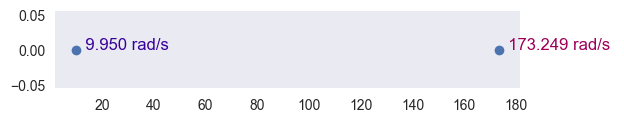

omega1 	 = 9.950 rad/s
omega2 	 = 173.249 rad/s
modal_mass_m = 
[[344.02243764   0.        ]
 [  0.          10.00496689]]
  
modal_stiffness_m = 
[[ 34057.24715418      0.        ]
 [     0.         300301.96823944]]
modal stiffness 1 	 = 	34057.247 N/m
modal mass 1 		 = 	344.02 kg
omega1 			 = 	9.95 rad/s
 
modal stiffness 2 	 = 	300301.968
modal mass 2 		 = 	10.00
omega2 			 = 	173.25 rad/s
omega1 	 = 9.950 rad/s   		 omega11 	 = 9.950 rad/s
omega2 	 = 173.249 rad/s 		 omega22 	 = 173.249 rad/s


C:\Users\marko\AppData\Local\Temp\ipykernel_4404\3357652372.py:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


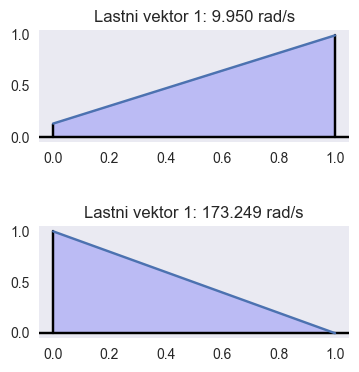

In [3]:
t = f.neodvisna_spremenljivka_t(40);
m1 = 10; #kg
k1 = 260*1000; #N/m

m2 = 350; #kg
k2 = 40*1000; #N/m

M = f.mass_matrix(m1, m2);
K = f.stiffness_matrix(k1, k2);

print('M = ')
print(M)
print('K = ')
print(K)


A = np.linalg.inv(M) @ K

eigenval, eigenvec = np.linalg.eig(A)
eigenvalues, eigenvectors = f.eig(eigenval, eigenvec)
# print(eigenvec)
f.print_eig(eigenvalues, eigenvectors)
print(f'{eigenvalues[0]:.3f} rad/s \t=>\t {eigenvectors[:,0]}')
print(f'{eigenvalues[1]:.3f} rad/s \t=>\t {eigenvectors[:,1]}')
plt.figure(figsize=(6,1))
plt.grid()
plt.plot(eigenvalues.real, eigenvalues.imag, 'o')
for i in range(len(eigenvalues)):
    plt.text(eigenvalues[i].real, eigenvalues[i].imag, f'  {eigenvalues[i]:.3f} rad/s ', fontsize=12, color=colors[i])
#plt.axhline(0, color='k', lw=1, alpha=0.2)
plt.show()

omega1 = eigenvalues[0]
omega2 = eigenvalues[1]

print(f'omega1 \t = {omega1:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s')
plt.figure(figsize=(4,4))
plt.title("Lastni vektorji")

plt.subplot(2,1,1)
plt.title(f'Lastni vektor 1: {eigenvalues[0]:.3f} rad/s')
plt.fill_between(np.arange(0,2), eigenvectors[:,0], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,0]], 'black')
plt.plot([1,1], [0, eigenvectors[1,0]], 'black')
plt.axhline(0, color='black')
plt.axhline(y=0, color='k', lw=0.2)
plt.grid()
plt.plot(eigenvectors[:,0])
# add horizontal space
plt.subplots_adjust(hspace=0.75)
plt.subplot(2,1,2)
plt.title(f'Lastni vektor 1: {eigenvalues[1]:.3f} rad/s')
plt.fill_between(np.arange(0,2), eigenvectors[:,1], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,1]], 'black')
plt.plot([1,1], [0, eigenvectors[1,1]], 'black')
# plt.ylim(0.95, 1.1)
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,1])

modal_mass_m, modal_stiffness_m = f.modal_mass_stiffness(eigenvectors, M, K)
print('modal_mass_m = ')
print(modal_mass_m)
print("  ")
print('modal_stiffness_m = ')
print(modal_stiffness_m)
omega11 = np.sqrt(modal_stiffness_m[0,0]/modal_mass_m[0,0])
omega22 = np.sqrt(modal_stiffness_m[1,1]/modal_mass_m[1,1])

print(f'modal stiffness 1 \t = \t{modal_stiffness_m[0,0]:.3f} N/m')
print(f'modal mass 1 \t\t = \t{modal_mass_m[0,0]:.2f} kg')
print(f'omega1 \t\t\t = \t{omega11:.2f} rad/s')
print(" ")
print(f'modal stiffness 2 \t = \t{modal_stiffness_m[1,1]:.3f}')
print(f'modal mass 2 \t\t = \t{modal_mass_m[1,1]:.2f}')
print(f'omega2 \t\t\t = \t{omega22:.2f} rad/s')
print(f'omega1 \t = {omega1:.3f} rad/s   \t\t omega11 \t = {omega11:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s \t\t omega22 \t = {omega22:.3f} rad/s')

## Definicija dušenja in $\omega_D$ in izpis

In [4]:
d_krit1 = np.sqrt(k1/m1)
d_krit2 = np.sqrt(k2/m2)
delta1 = 0.1;
delta2 = 0.3;
print(f'delta1 = {delta1:.2f} \t delta1_krit = {d_krit1:.2f}')
print(f'delta2 = {delta2:.2f} \t delta2_krit = {d_krit2:.2f}')
omega1D = omega1 * np.sqrt(1 - delta1**2)
omega2D = omega2 * np.sqrt(1 - delta2**2)
print(f'omega1 = {omega1:.2f} rad/s')
print(f'omega1D = {omega1D:.2f} rad/s')
print(" ")
print(f'omega2 = {omega2:.2f} rad/s')
print(f'omega2D = {omega2D:.2f} rad/s')
print("M: ")
print(M)
print("K: ")
print(K)
print(" ")
print("Lastne frekvence in vektorji: ")
print(f'{eigenvalues[0]:.3f} rad/s \t => \t {eigenvectors[:,0]}')
print(f'{eigenvalues[1]:.3f} rad/s \t => \t {eigenvectors[:,1]}')


delta1 = 0.10 	 delta1_krit = 161.25
delta2 = 0.30 	 delta2_krit = 10.69
omega1 = 9.95 rad/s
omega1D = 9.90 rad/s
 
omega2 = 173.25 rad/s
omega2D = 165.27 rad/s
M: 
[[ 10.   0.]
 [  0. 350.]]
K: 
[[300000. -40000.]
 [-40000.  40000.]]
 
Lastne frekvence in vektorji: 
9.950 rad/s 	 => 	 [0.13259361 0.99117049]
173.249 rad/s 	 => 	 [ 0.9999927  -0.00382211]


## Relativni pomiki glede na $y(t)$

$$\{z\} = \{x\} - y(t)$$
$$\{z\}
   = \begin{bmatrix}  x_1(t) - y(t) \\ x_2(t) - y(t) \end{bmatrix} $$

## Definicija vzbujanja

$$[\bf{M}] \cdot \{\ddot{z}\} + [\bf{K}] \cdot \{z\} = - [\bf{M}] \cdot [\bf{B}] \cdot \ddot{y} (t)$$

"Ležeči policaj" je dolg cca 0.5m in je lahko visok 5cm. Če želimo dobiti pravilni y(t) glede na hitrost:

B: 
[[1.]
 [1.]]


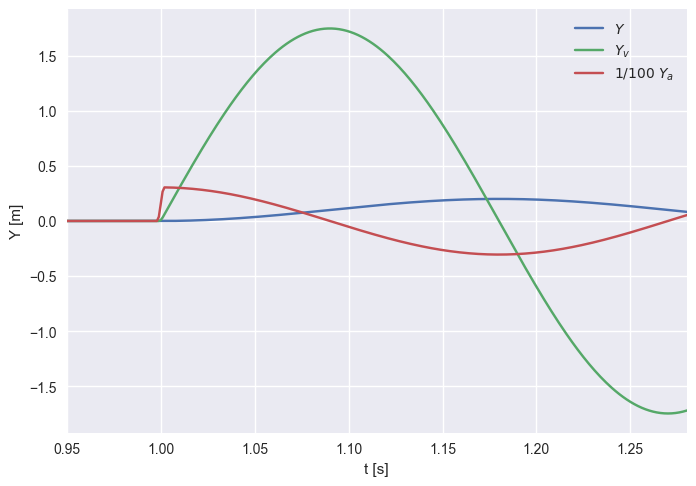

In [5]:
hitrost = 10 # km/h
hitrost = hitrost/3.6; # m/s
L = 0.5; # m
ff = 1/(2*L/hitrost); # Hz
y = np.sin(2 * np.pi * ff * t + 3*np.pi/2) + 1
t1 = 2/(2*ff);
delta_t=t[1]-t[0]

t11 = t1 % (t[1] - t[0])
T1 = t1 - t11
T1
o = 0.1; #m - višina policaja
Y = np.zeros_like(t)
t_index = np.where(t == T1)
t2 = 1000 + t_index[0][0] + 1
Y[1000:t2] = y[0:t2-1000] * o;
Y_v = np.gradient(Y, delta_t)
Y_a = np.gradient(Y_v, delta_t)
plt.plot(t[:5000], Y[:5000], label=f'$Y$')
plt.plot(t[:5000], Y_v[:5000], label=f'$Y_v$')
plt.plot(t[:5000], 0.01*Y_a[:5000], label=f'$1/100 \ Y_a$')    
plt.xlim(0.95, 1.28)
plt.ylabel('Y [m]')
plt.xlabel('t [s]')
plt.legend()
B = np.ones((2,1))
print("B: ")
print(B)
Ft = np.zeros((2, len(t)))
Ft = - M @ B * Y_a
Modal_Ft = np.zeros((2, len(t)))
Modal_Ft = eigenvectors.T @ Ft

In [6]:
print(f'ff: \t {ff:.2f} Hz')
print(f'Modal_Ft[1]: \t {Modal_Ft[1][1000]}')

ff: 	 2.78 Hz
Modal_Ft[1]: 	 -131.91928665253295


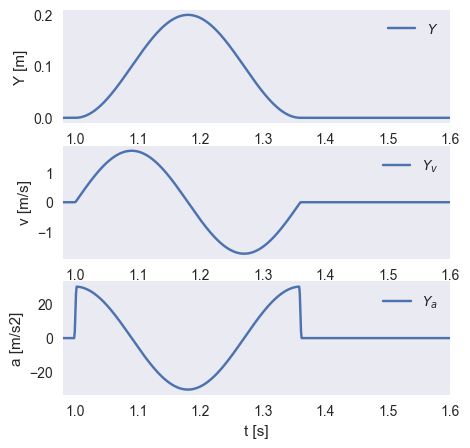

In [18]:
plt.figure(figsize=(5, 5))

plt.subplot(3, 1, 1)
plt.plot(t[:8000], Y[:8000], label=f'$Y$')
plt.xlim(0.98, 1.6)
plt.ylabel('Y [m]')
plt.xlabel('t [s]')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t[:8000], Y_v[:8000], label=f'$Y_v$')  
plt.xlim(0.98, 1.6)
plt.ylabel('v [m/s]')
plt.xlabel('t [s]')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t[:8000], Y_a[:8000], label=f'$Y_a$') 
plt.xlim(0.98, 1.6)
plt.ylabel('a [m/s2]')
plt.xlabel('t [s]')
plt.legend()
plt.grid()

In [19]:
print(f'ff: \t {ff:.2f} Hz')
print(f'Modal_Ft[1]: \t {Modal_Ft[1][1000]}')

ff: 	 2.78 Hz
Modal_Ft[1]: 	 -131.91928665253295


Pri prehodu v modalne koordinate:$$[\bf{M}] \cdot \{\ddot{z}\} + [\bf{K}] \cdot \{z\} = - [\bf{M}] \cdot [\bf{B}] \cdot \ddot{y} (t)$$
$$leva \ stran = [\Phi]^T \cdot \{ F(t)\}$$

Ne pozabimo: zdaj je: $$z(t) = [\Phi]^T \cdot \xi (t)$$

## Konvolucija

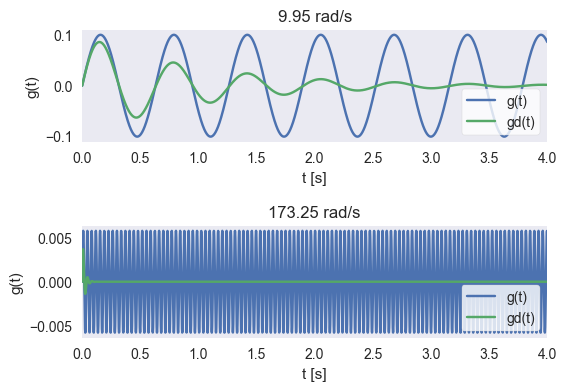

In [8]:
g_1 = 1/omega1 * np.sin(omega1 * t)
g_2 = 1/omega2 * np.sin(omega2 * t)

g_1d = 1/omega1 * np.exp(-delta1 * omega1 * t) * np.sin(omega1D * t)
g_2d = 1/omega2 * np.exp(-delta2 * omega2 * t) * np.sin(omega2D * t)

plot1 = plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.title(f'{omega1:.2f} rad/s')
plt.xlim(0, 4)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_1)
plt.plot(t, g_1d) 
plt.grid()
plt.legend(['g(t)', 'gd(t)'], frameon=True, facecolor='white')
plt.subplot(2,1,2)
#add empty space between subplots
plt.subplots_adjust(hspace=0.75)
plt.title(f'{omega2:.2f} rad/s')
plt.xlim(0, 4)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_2)
plt.plot(t, g_2d)
plt.grid()
plt.legend(['g(t)', 'gd(t)'], frameon=True, facecolor='white')

### Izračun $\xi_1$ in $\xi_2$

In [9]:
#1
eta1 = np.convolve(Modal_Ft[0,:], g_1) * (t[1] - t[0])
eta1d = np.convolve(Modal_Ft[0,:], g_1d) * (t[1] - t[0])

#2
eta2 = np.convolve(Modal_Ft[1,:], g_2) * (t[1] - t[0])
eta2d = np.convolve(Modal_Ft[1,:], g_2d) * (t[1] - t[0])

eta = np.zeros((2, 2*len(t) - 1))
eta[0,:] = eta1
eta[1,:] = eta2

etaD = np.zeros((2, 2*len(t) - 1))
etaD[0,:] = eta1d
# etaD[1,:] = eta2d

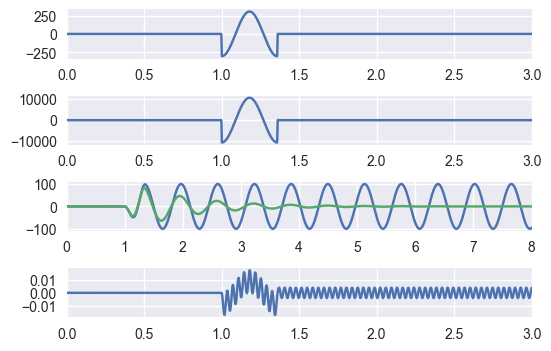

In [24]:
plt.figure(figsize=(6,4))

plt.subplot(4,1,1)
plt.plot(t, Ft[0])
plt.xlim(0, 3)
plt.subplot(4,1,2)
plt.plot(t, Ft[1])
plt.xlim(0, 3)

plt.subplots_adjust(hspace=0.75)

plt.subplot(4,1,3)
plt.xlim(0, 8)
plt.plot(t, eta1[:len(t)])
plt.plot(t, eta1d[:len(t)])
plt.subplots_adjust(hspace=0.5)

plt.subplots_adjust(hspace=0.75)

plt.subplot(4,1,4)
plt.xlim(0, 3)
plt.plot(t, eta2[:len(t)])
# plt.plot(t, eta2d[:len(t)])

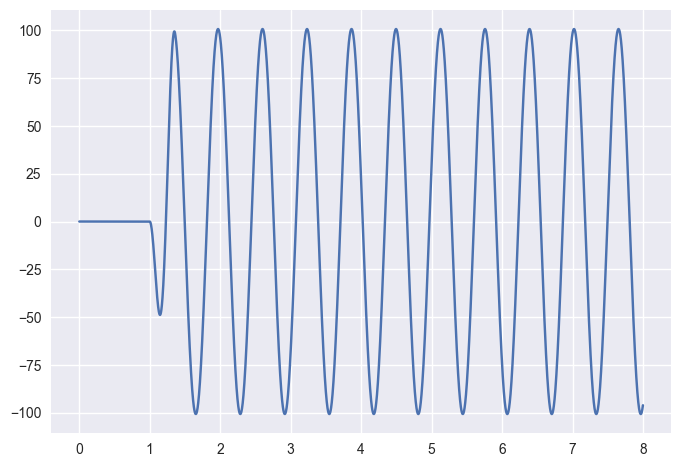

In [20]:
plt.plot(t[:8000], eta[0,:8000], label=f'$\eta_1$')

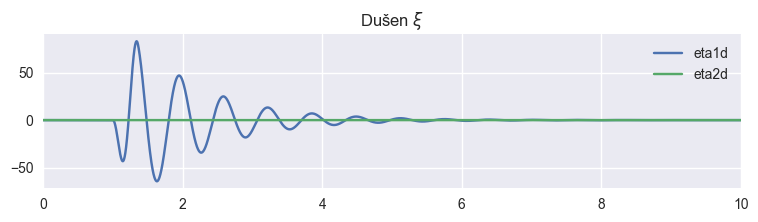

In [11]:
plt.figure(figsize=(9,2))
plt.title(r'Dušen $\xi$')
plt.xlim(0, 10)
plt.plot(t, eta1d[:len(t)], label='eta1d')
plt.plot(t, eta2d[:len(t)], label='eta2d')
plt.legend()

## Iz modalnega prostora nazaj v realnega

$$\{z(t)\}=[\Phi] \cdot \{\xi(t)\}$$

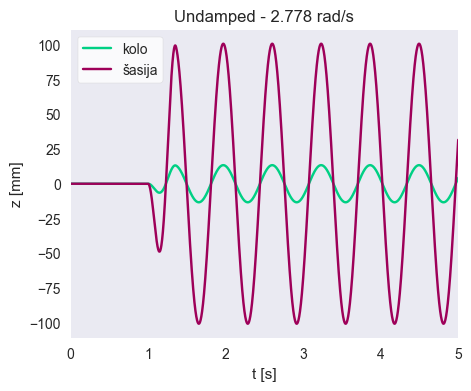

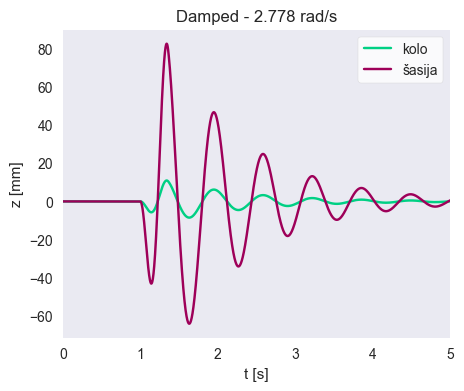

In [12]:
v_pom = 0
z1_1 = eigenvectors[:,0] @ eta
z1_2 = eigenvectors[:,1] @ eta

z1_1D = eigenvectors[:,0] @ etaD
z1_2D = eigenvectors[:,1] @ etaD

#plot x1_1 and x1_2
plt.figure(figsize=(5,4))
plt.title(f'Undamped - {ff:.3f} rad/s')
plt.xlim(0, 5)
plt.xlabel('t [s]')
plt.ylabel('z [mm]')
plt.plot(t, z1_1[:len(t)], color = colors[6])
plt.plot(t, v_pom + z1_2[:len(t)], color = colors[1])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')

#plot x1_1D and x1_2D
plt.figure(figsize=(5,4))
plt.title(f'Damped - {ff:.3f} rad/s')
plt.xlim(0, 5)
plt.xlabel('t [s]')
plt.ylabel('z [mm]')
plt.plot(t, z1_1D[:len(t)], color = colors[6])
plt.plot(t, v_pom + z1_2D[:len(t)], color = colors[1])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')


$$\{x(t)\} = \{z(t)\} + y(t)$$

In [13]:
eigenvectors[:,0] #prvi lastni vektor

array([0.13259361, 0.99117049])

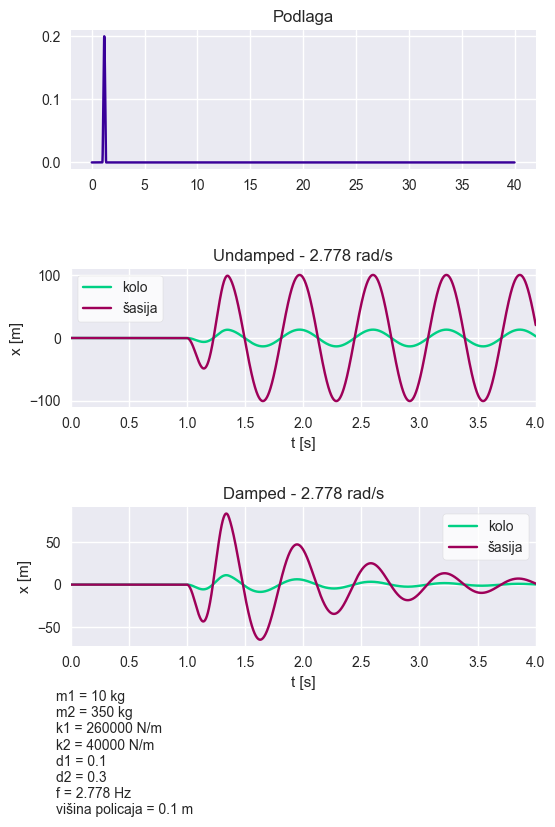

In [14]:
v_pom = 0
scale = 1;
x1_1 = z1_1[:len(t)] + scale * Y[:len(t)]
x1_2 = z1_2[:len(t)] + scale * Y[:len(t)]

x1_1D = z1_1D[:len(t)] + scale * Y[:len(t)]
x1_2D = z1_2D[:len(t)] + scale * Y[:len(t)]

#plot x1_1 and x1_2
plt.figure(figsize=(6,8))

plt.subplot(3,1,1)
plt.title("Podlaga")
plt.plot(t, Y, color = colors[0])

plt.subplots_adjust(hspace=0.72)

plt.subplot(3,1,2)
plt.title(f'Undamped - {ff:.3f} rad/s')
plt.xlim(0, 4)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x1_1[:len(t)], color = colors[6])
plt.plot(t, v_pom + x1_2[:len(t)], color = colors[1])
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')

plt.subplots_adjust(hspace=0.72)

plt.subplot(3,1,3)
plt.title(f'Damped - {ff:.3f} rad/s')
plt.xlim(0, 4)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x1_1D[:len(t)], color = colors[6])
plt.plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')

plt.figtext(0.1, -0.1, f'm1 = {m1} kg\nm2 = {m2} kg\nk1 = {k1} N/m\nk2 = {k2} N/m\nd1 = {delta1}\nd2 = {delta2} \
    \nf = {ff:.3f} Hz \nvišina policaja = {o} m', fontsize = 10)


f_z = f'{ff:.3f}'
if not os.path.exists(f'./rez{m1}_{delta1}_{k1/1000}_{m2}_{delta2}_{k2/1000}'):
    os.makedirs(f'./rez{m1}_{delta1}_{k1/1000}_{m2}_{delta2}_{k2/1000}')

plt.savefig(f'./rez{m1}_{delta1}_{k1/1000}_{m2}_{delta2}_{k2/1000}/pomik_{m1}_{f_z}_rad_s.png', dpi=300)


In [22]:
xD = np.array([x1_1D, x1_2D])

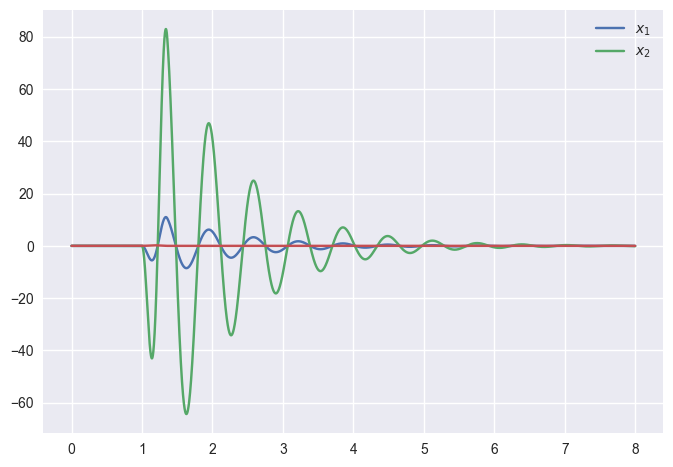

In [23]:
plt.plot(t[:8000], xD[0, :8000], label=f'$x_1$')
plt.plot(t[:8000], xD[1, :8000], label=f'$x_2$')
plt.legend()
plt.plot(t[:8000], Y[:8000], label=f'$x_2$')

In [15]:
v11 = np.gradient(x1_1, delta_t)
a11 = np.gradient(v11, delta_t)
v12 = np.gradient(x1_2, delta_t)
a12 = np.gradient(v12, delta_t)

v11D = np.gradient(x1_1D, delta_t)
a11D = np.gradient(v11D, delta_t)
v12D = np.gradient(x1_2D, delta_t)
a12D = np.gradient(v12D, delta_t)


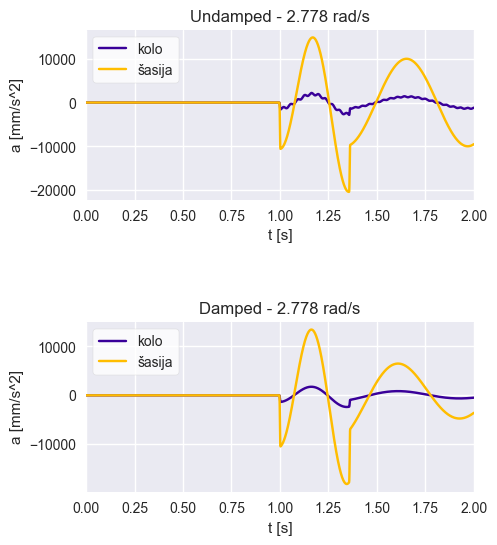

In [16]:
# plot x11 and x12
plt.figure(figsize=(5, 6))
plt.subplot(2,1,1)
plt.title(f'Undamped - {ff:.3f} rad/s')
plt.xlim(0, 2.0)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s^2]')
plt.plot(t, a11[:len(t)], color=colors[0])
plt.plot(t, a12[:len(t)], color=colors[4])
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')

plt.subplots_adjust(hspace=0.72)

plt.subplot(2,1,2)
plt.title(f'Damped - {ff:.3f} rad/s')
plt.xlim(0, 2.0)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s^2]')
plt.plot(t, a11D[:len(t)], color=colors[0])
plt.plot(t, a12D[:len(t)], color=colors[4])
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')

if not os.path.exists(f'./rez{m1}_{delta1}_{k1/1000}_{m2}_{delta2}_{k2/1000}'):
    os.makedirs(f'./rez{m1}_{delta1}_{k1/1000}_{m2}_{delta2}_{k2/1000}')

plt.savefig(f'./rez{m1}_{delta1}_{k1/1000}_{m2}_{delta2}_{k2/1000}/pospesek_{m1}_{f_z}_rad_s.png', dpi=300)


## Skupni izris

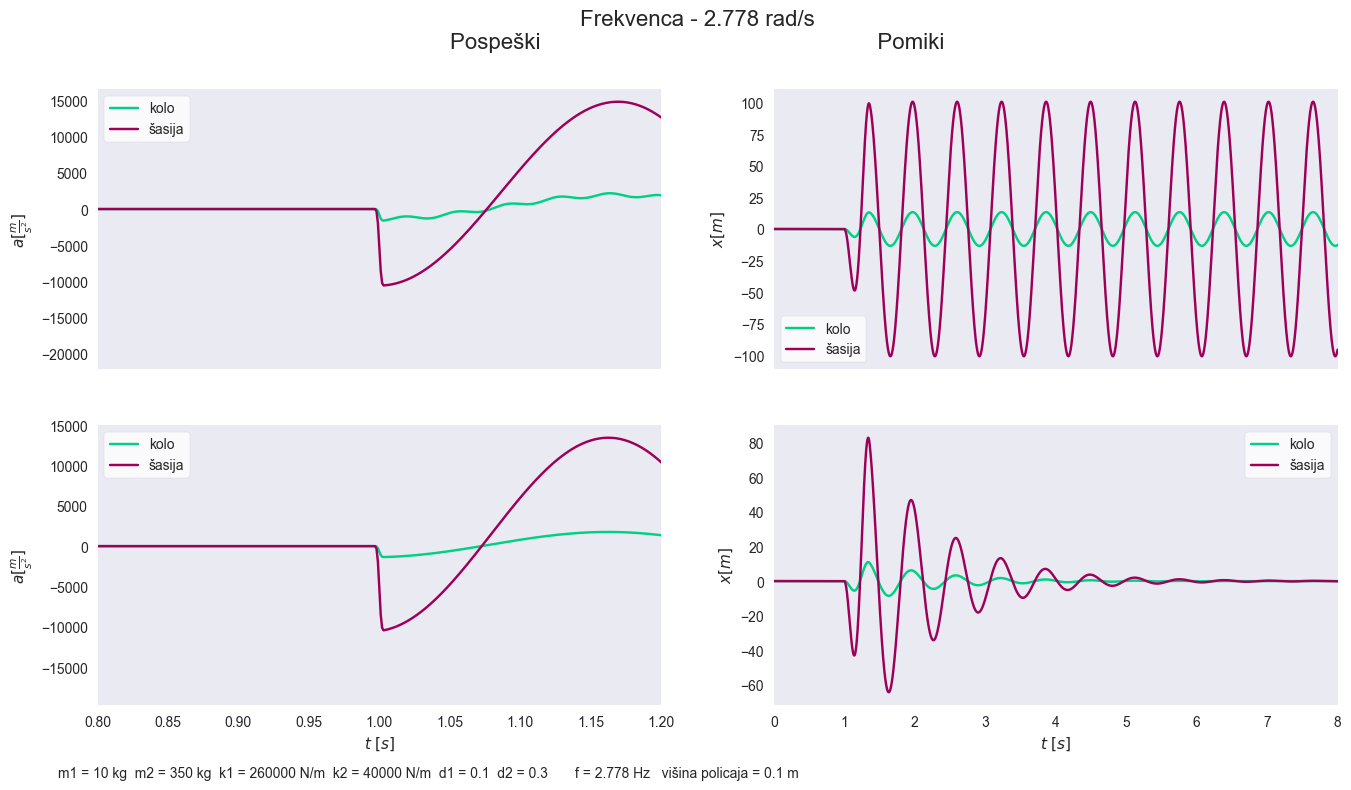

In [17]:
#create figure with 2 rows and 2 columns plots
fig, axs = plt.subplots(2, 2, figsize=(16,8))

# plt.subplots_adjust(bottom=0.5, top=2.9)
#set title
fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\n', fontsize=12)
#limit x
axs[0, 0].set_xlim(0.8, 1.2)
axs[1, 0].set_xlim(0.8, 1.2)

#set x and y labels
axs[0, 0].set_ylabel(r'$a [\frac{m}{s^2}]$')
axs[1, 0].set_ylabel(r'$a [\frac{m}{s^2}]$')
# remove x ticks
axs[0, 0].set_xticks([]) 
axs[0, 1].set_xticks([])
#plot x1_1 and x1_2
axs[0, 0].plot(t, a11[:len(t)], color = colors[6])
axs[0, 0].plot(t, v_pom + a12[:len(t)], color = colors[1])
axs[0, 0].grid()
axs[0, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#plot x1_1D and x1_2D
axs[1, 0].plot(t, a11D[:len(t)], color = colors[6])
axs[1, 0].plot(t, v_pom + a12D[:len(t)], color = colors[1])
axs[1, 0].grid()
axs[1, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')


#set title
fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\nPospeški                                                       Pomiki', fontsize=16)
#limit x
axs[0, 1].set_xlim(0, 8)
axs[1, 1].set_xlim(0, 8)
#set x and y labels
plt.subplots_adjust(hspace=0.2)
axs[1, 0].set_xlabel(r'$t \ [s]$')
axs[0, 1].set_ylabel(r'$x  [m]$')
axs[1, 1].set_xlabel(r'$t \ [s]$')
axs[1, 1].set_ylabel(r'$x  [m]$')
#plot x1_1 and x1_2
axs[0, 1].plot(t, x1_1[:len(t)], color = colors[6])
axs[0, 1].plot(t, v_pom + x1_2[:len(t)], color = colors[1])
axs[0, 1].grid()
axs[0, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#plot x1_1D and x1_2D
axs[1, 1].plot(t, x1_1D[:len(t)], color = colors[6])
axs[1, 1].plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
axs[1, 1].grid()
axs[1, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')

plt.figtext(0.1, 0.02, f'm1 = {m1} kg  m2 = {m2} kg  k1 = {k1} N/m  k2 = {k2} N/m  d1 = {delta1}  d2 = {delta2} \
      f = {ff:.3f} Hz   višina policaja = {o} m', fontsize = 10)


if not os.path.exists(f'./rez{m1}_{delta1}_{k1/1000}_{m2}_{delta2}_{k2/1000}'):
    os.makedirs(f'./rez{m1}_{delta1}_{k1/1000}_{m2}_{delta2}_{k2/1000}')

plt.savefig(f'./rez{m1}_{delta1}_{k1/1000}_{m2}_{delta2}_{k2/1000}/rez_m1_{m1}_{f_z}_rad_s.png', dpi=300)